## MNIST
Plot and explain the filters.
How few parameters can I use?

In [36]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils, losses, optimizers, callbacks, regularizers
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib notebook

### Load data, one hot encode

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

x_val = x_train[50000:, :, :, :]
y_val = y_train[50000:]
x_train = x_train[:50000, :, :, :]
y_train = y_train[:50000]

num_classes = 10
y_train_onehot = utils.to_categorical(y_train, num_classes)
y_val_onehot = utils.to_categorical(y_val, num_classes)
y_test_onehot = utils.to_categorical(y_val, num_classes)

data_shape = x_train.shape[1:]

11493376/11490434 [==============================] - 2s 0us/step


### Plot a few examples

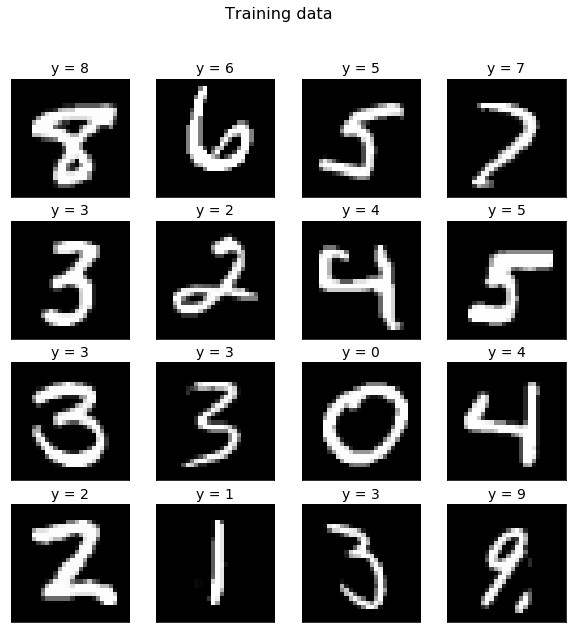

In [3]:
# Get sixteen training examples
examples = np.random.randint(0, high=x_train.shape[0], size=16)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
# fig.subplots_adjust(bottom=0.17, hspace=0.2)
fig.suptitle('Training data', fontsize=16)
for ynum in range(4):
    for xnum in range(4):
        indexnum = 4 * ynum + xnum
        ax = axs[xnum, ynum]
        ax.imshow(x_train[examples[indexnum], :, :, 0], cmap='gray')
        ax.set_title('y = %i' % y_train[examples[indexnum]], fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
plt.savefig('/data/imgs/mnist-trainingeg1.png', dpi=200)

### Create model

In [10]:
def model1():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(64, (3, 3), activation='relu', name='Conv_2', kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(64, (3, 3), activation='relu', name='Conv_3', kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name='Dense_4'))
    model.add(Dropout(0.5, name='Dropout_4'))
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model2():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(32, (3, 3), activation='relu', name='Conv_2', kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', name='Dense_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model3():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(32, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', name='Dense_4'))
    model.add(Dropout(0.5, name='Dropout_4'))
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model4():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(32, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Flatten())
    model.add(Dense(16, activation='relu', name='Dense_4'))
    model.add(Dropout(0.5, name='Dropout_4'))
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model5():
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(16, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Flatten())
    model.add(Dense(16, activation='relu', name='Dense_4'))
    model.add(Dropout(0.5, name='Dropout_4'))
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model6():
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(16, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model7():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(12, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(12, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model8():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(6, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(6, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model9():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(6, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(6, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Conv2D(1, (1, 1), activation='relu', name='Conv_4', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model10():
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(4, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(4, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Conv2D(1, (1, 1), activation='relu', name='Conv_4', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model11():
    model = Sequential()
    model.add(Conv2D(3, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5, name='Dropout_1'))

    model.add(Conv2D(3, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(3, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Conv2D(1, (1, 1), activation='relu', name='Conv_4', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(Flatten())
    model.add(Dense(4, activation='relu', name='Dense_5'))
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model12():
    model = Sequential()
    model.add(Conv2D(3, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5, name='Dropout_1'))

    model.add(Conv2D(3, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(3, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Conv2D(1, (1, 1), activation='relu', name='Conv_4', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(Flatten())
    model.add(Dense(5, activation='relu', name='Dense_5'))
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model13():
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(4, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(3, 3), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(4, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(3, 3), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Conv2D(1, (1, 1), activation='relu', name='Conv_4', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

def model14():
    model = Sequential()
    model.add(Conv2D(3, kernel_size=(3, 3),
                     activation='relu', padding='same', 
                     input_shape=data_shape, name='Conv_1', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5, name='Dropout_1'))
    model.add(Conv2D(2, (3, 3), activation='relu', padding='same', name='Conv_2', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))
    model.add(Dropout(0.5, name='Dropout_2'))
    model.add(Conv2D(2, (3, 3), activation='relu', name='Conv_3', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))
    model.add(Dropout(0.5, name='Dropout_3'))
    model.add(Conv2D(1, (1, 1), activation='relu', name='Conv_4', padding='same', 
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(Flatten())
    model.add(Dense(2, activation='relu', name='Dense_5'))
    model.add(Dense(num_classes, activation='softmax', name='Output'))
    return model

### Compile and train model

In [11]:
model = model1()
modelstr = 'model1'

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adam(lr=0.0003),
              metrics=['accuracy'])
model.summary()

# if not os.path.isdir('/tmp/weights'):
#     os.makedir('/tmp/weights')
# filepath="/tmp/weights/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True)
earlystop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto', 
                                    baseline=None)
callbacks_list = [earlystop]

history = model.fit(x_train, y_train_onehot, batch_size=256, epochs=150,
          verbose=2, validation_data=(x_val, y_val_onehot), callbacks=callbacks_list)

score_train = model.evaluate(x_train, y_train_onehot, verbose=0)
score_val = model.evaluate(x_val, y_val_onehot, verbose=0)
score_test = model.evaluate(x_test, y_test_onehot, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_2 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
Pool_2 (MaxPooling2D)        (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 10, 10, 64)        36928     
_________________________________________________________________
Pool_3 (MaxPooling2D)        (None, 5, 5, 64)          0         
_________________________________________________________________
Dropout_3 (Dropout)          (None, 5, 5, 64)          0         
__________

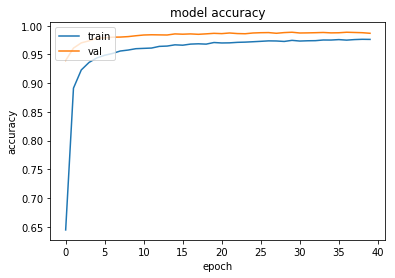

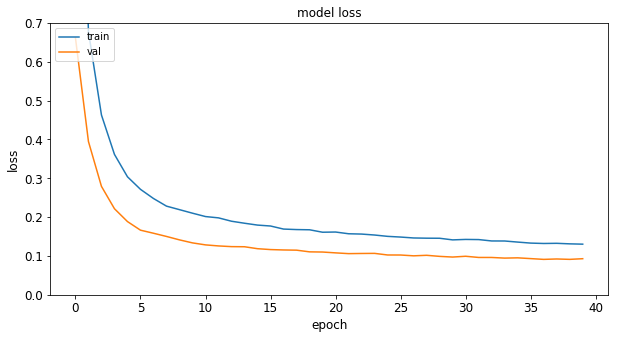

In [12]:
# Make nice printed output showing loss plot and results.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# summarize history for loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0, 0.7])
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('/data/imgs/mnist-training_%s_loss.png' % modelstr, dpi=200)



In [13]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
# Confusion matrix
cnf_matrix = confusion_matrix(y_test,y_test_pred_classes)
print(cnf_matrix)
print('\n')
print(classification_report(y_test,y_test_pred_classes,digits=4))

[[ 977    1    0    0    0    0    0    1    1    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   2    2 1025    0    0    0    0    2    1    0]
 [   1    0    2  996    0    3    0    6    2    0]
 [   0    0    0    0  978    0    1    0    0    3]
 [   2    0    0    6    0  879    2    1    0    2]
 [   7    2    0    0    1    2  945    0    1    0]
 [   1    1    6    1    0    0    0 1017    1    1]
 [   8    1    2    1    1    0    1    3  954    3]
 [   4    5    1    1    6    2    0    6    0  984]]


             precision    recall  f1-score   support

          0     0.9750    0.9969    0.9859       980
          1     0.9895    0.9991    0.9943      1135
          2     0.9884    0.9932    0.9908      1032
          3     0.9910    0.9861    0.9886      1010
          4     0.9919    0.9959    0.9939       982
          5     0.9921    0.9854    0.9888       892
          6     0.9958    0.9864    0.9911       958
          7     0.9817    0.9893    0.9855

### Plot a few (random) test examples

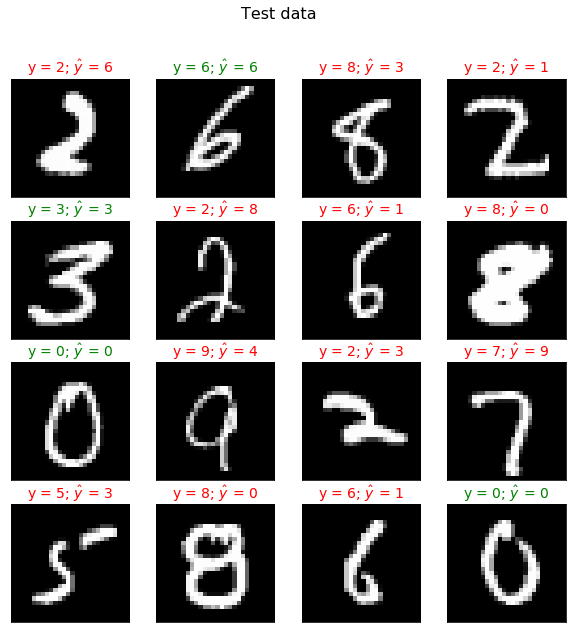

In [241]:
# Get sixteen test examples
examples = np.random.randint(0, high=x_test.shape[0], size=16)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
# fig.subplots_adjust(bottom=0.17, hspace=0.2)
fig.suptitle('Test data', fontsize=16)
for ynum in range(4):
    for xnum in range(4):
        indexnum = 4 * ynum + xnum
        true_val = y_test[examples[indexnum]]
        pred_val = y_test_pred_classes[examples[indexnum]]
        if true_val == pred_val:
            colour = 'green'
        else:
            colour = 'red'
        ax = axs[xnum, ynum]
        ax.imshow(x_test[examples[indexnum], :, :, 0], cmap='gray')
        ax.set_title('y = %i; $\^y$ = %i' % (true_val, pred_val), fontsize=14, color=colour)
        ax.set_xticks([])
        ax.set_yticks([])
plt.savefig('/data/imgs/mnist-training_%s_test_eg1.png' % modelstr, dpi=200)

Plot a few test failures

Number of failures: 1884


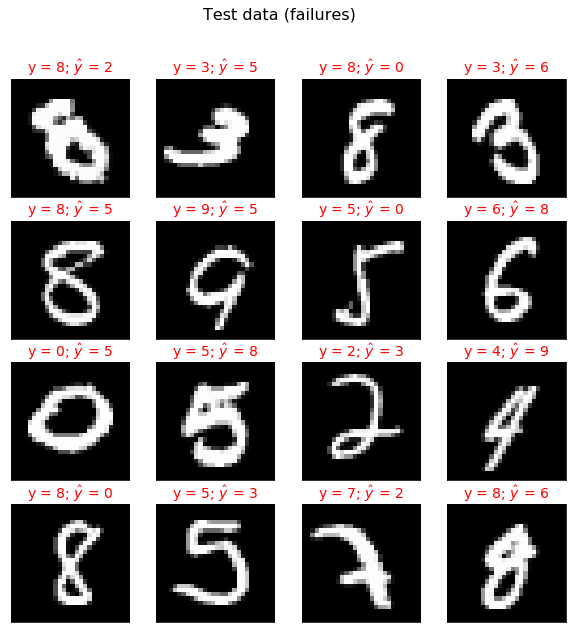

In [204]:
# Find failures
truth = y_test_pred_classes == y_test
failures = np.argwhere(~truth)
print('Number of failures:', len(failures.squeeze()))
# Permutate and pick first 16 of failures
examples = np.random.permutation(failures)[:16].squeeze()
# Plot
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
# fig.subplots_adjust(bottom=0.17, hspace=0.2)
fig.suptitle('Test data (failures)', fontsize=16)
for ynum in range(4):
    for xnum in range(4):
        indexnum = 4 * ynum + xnum
        true_val = y_test[examples[indexnum]]
        pred_val = y_test_pred_classes[examples[indexnum]]
        if true_val == pred_val:
            colour = 'green'
        else:
            colour = 'red'
        ax = axs[xnum, ynum]
        ax.imshow(x_test[examples[indexnum], :, :, 0], cmap='gray')
        ax.set_title('y = %i; $\^y$ = %i' % (true_val, pred_val), fontsize=14, color=colour)
        ax.set_xticks([])
        ax.set_yticks([])
plt.savefig('/data/imgs/mnist-training_%s_test_failures_eg1.png' % modelstr, dpi=200)

### Plotting kernels

In [242]:
# Print the number of weights for each layer
n_layers = len(model.layers)
for layer_no in range(n_layers):
    print('-- Layer number %i: %s --' % (layer_no, model.layers[layer_no].name))
    try:
        weights = model.layers[layer_no].get_weights()[0]
    except IndexError:
        print('None')
    else:
        print(weights.shape)

-- Layer number 0: Conv_1 --
(3, 3, 1, 3)
-- Layer number 1: Dropout_1 --
None
-- Layer number 2: Conv_2 --
(3, 3, 3, 2)
-- Layer number 3: Pool_2 --
None
-- Layer number 4: Dropout_2 --
None
-- Layer number 5: Conv_3 --
(3, 3, 2, 2)
-- Layer number 6: Pool_3 --
None
-- Layer number 7: Dropout_3 --
None
-- Layer number 8: Conv_4 --
(1, 1, 2, 1)
-- Layer number 9: flatten_39 --
None
-- Layer number 10: Dense_5 --
(49, 2)
-- Layer number 11: Output --
(2, 10)


#### Print all examples from layer number x

n_kernels: 3
3 1
0 0


IndexError: too many indices for array

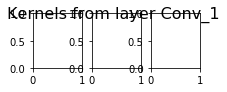

In [252]:
layer_no = 0
layer_name = model.layers[layer_no].name
weights = model.layers[layer_no].get_weights()[0]
n_kernels = weights.shape[3]
print('n_kernels:', n_kernels)
ncols, nrows = 3, 1
print(ncols, nrows)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3,1))
# fig.subplots_adjust(bottom=0.17, hspace=0.2)
fig.suptitle('Kernels from layer %s' % layer_name, fontsize=16)
for ynum in range(nrows):
    for xnum in range(ncols):
        indexnum = ncols * ynum + xnum
        these_weights = weights[:, :, 0, indexnum]
        print(ynum, xnum)
        ax = axs[ynum, xnum]
        ax.imshow(these_weights, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
filename = '/data/imgs/mnist-training_%s_kernels_layer_%i_%s.png' % (modelstr, layer_no, layer_name)
plt.savefig(filename, dpi=200)



In [245]:
layer_no = 1
layer_name = model.layers[layer_no].name
weights = model.layers[layer_no].get_weights()[0]
n_kernels = weights.shape[3]
print('n_kernels:', n_kernels)
ncols, nrows = 2, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2,2))
# fig.subplots_adjust(bottom=0.17, hspace=0.2)
fig.suptitle('Kernels from layer %s' % layer_name, fontsize=16)
for ynum in range(nrows):
    for xnum in range(ncols):
        indexnum = ncols * ynum + xnum
        these_weights = weights[:, :, 0, indexnum]
        ax = axs[ynum, xnum]
        ax.imshow(these_weights, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
filename = '/data/imgs/mnist-training_%s_kernels_layer_%i_%s.png' % (modelstr, layer_no, layer_name)
plt.savefig(filename, dpi=200)


IndexError: list index out of range

Imshow weights from a dense layer

In [246]:
layer_no = 5
layer_name = model.layers[layer_no].name
weights = model.layers[layer_no].get_weights()[0]
print(weights.shape)
plt.imshow(weights.reshape(576, 512))
plt.colorbar()
# n_kernels = weights.shape[3]
# print('n_kernels:', n_kernels)
# ncols, nrows = 8, 8
# fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,8))
# # fig.subplots_adjust(bottom=0.17, hspace=0.2)
# fig.suptitle('Kernels from layer %s' % layer_name, fontsize=16)
# for ynum in range(nrows):
#     for xnum in range(ncols):
#         indexnum = ncols * ynum + xnum
#         these_weights = weights[:, :, 0, indexnum]
#         ax = axs[ynum, xnum]
#         ax.imshow(these_weights, cmap='gray')
#         ax.set_xticks([])
#         ax.set_yticks([])
filename = '/data/imgs/mnist-training_%s_dense_layer_%i_%s_reshaped.png' % (modelstr, layer_no, layer_name)
plt.xticks([])
plt.yticks([])

plt.savefig(filename, dpi=200)


(3, 3, 2, 2)


ValueError: cannot reshape array of size 36 into shape (576,512)

### Plotting feature space
Remember this is our model:

Conv_1 (Conv2D)              (None, 26, 26, 32)        320       
Conv_2 (Conv2D)              (None, 24, 24, 64)        18496     
Pool_2 (MaxPooling2D)        (None, 12, 12, 64)        0         
Dropout_2 (Dropout)          (None, 12, 12, 64)        0         
Conv_3 (Conv2D)              (None, 10, 10, 64)        36928     
Pool_3 (MaxPooling2D)        (None, 5, 5, 64)          0         
Dropout_3 (Dropout)          (None, 5, 5, 64)          0         
flatten_2 (Flatten)          (None, 1600)              0         
Dense_4 (Dense)              (None, 128)               204928    
Dropout_4 (Dropout)          (None, 128)               0         


In [20]:
from sklearn.manifold import TSNE

In [17]:
# Get results from intermediate layer
y_val_pred = model.predict(x_test)
y_val_pred_classes = np.argmax(y_test_pred, axis=1)

layer_name = 'Dense_4'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_val)



In [21]:
x_embedded = TSNE().fit_transform(intermediate_output)

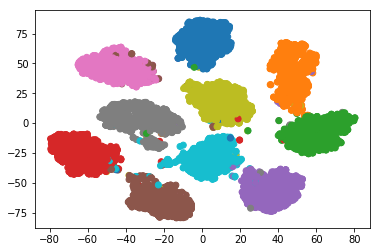

In [29]:
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=y_val, cmap='tab10')

In [30]:
x_embedded_3 = TSNE(n_components=3).fit_transform(intermediate_output)

<IPython.core.display.Javascript object>


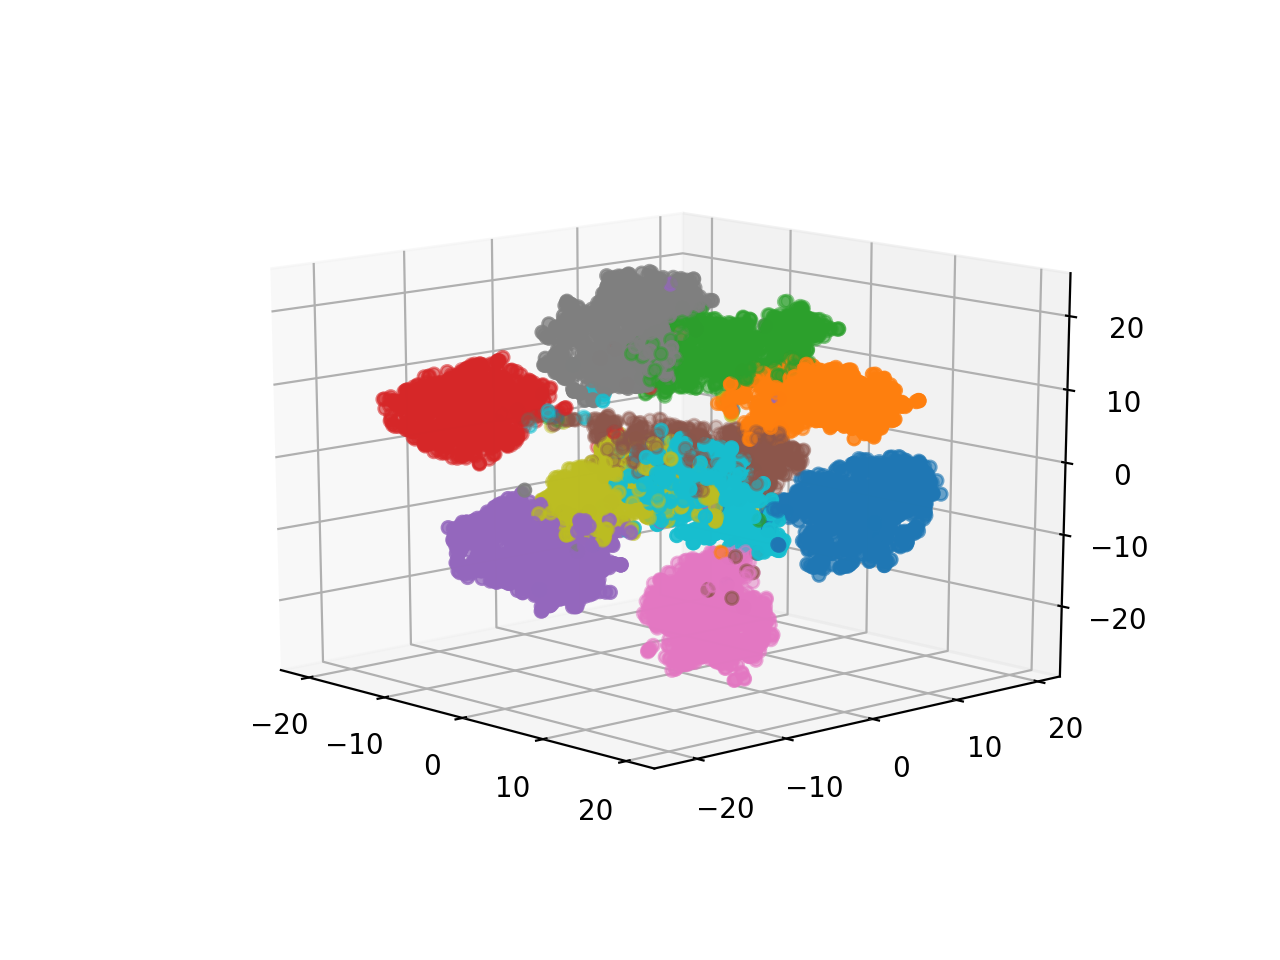

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=x_embedded_3[:,0], ys=x_embedded_3[:,1], zs=x_embedded_3[:,2], 
               zdir='z', s=20, c=y_val, cmap='tab10')
